Step 1: Import Libraries and Load Dataset

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("advertising.csv")  # Make sure the file is in the same folder

# Display first few rows
df.head()


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


Step 2: Explore and Clean the Data

In [3]:
# Step 2.1: Basic info
df.info()

# Step 2.2: Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

# Step 2.3: Summary statistics
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB

Missing values:
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


Step 3: Data Visualization

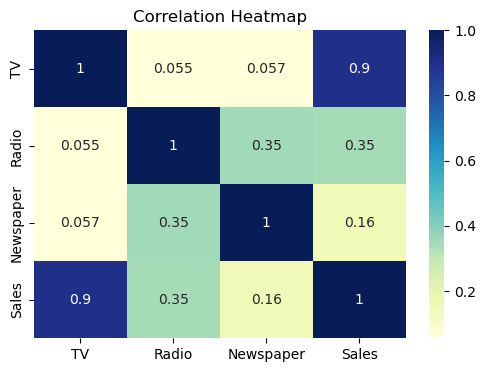

In [4]:
plt.figure(figsize=(6, 4))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")
plt.title("Correlation Heatmap")
plt.show()


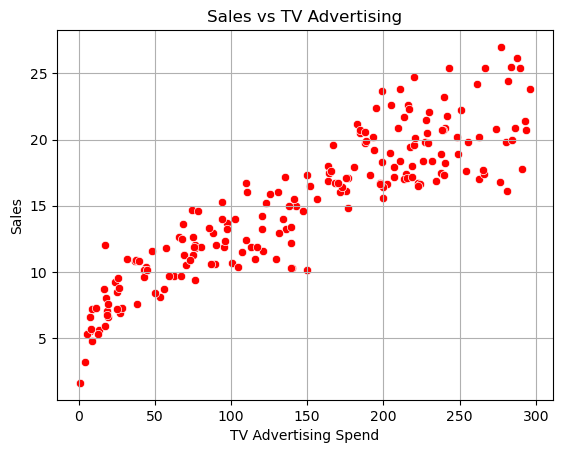

In [5]:
sns.scatterplot(x='TV', y='Sales', data=df, color='red')
plt.title("Sales vs TV Advertising")
plt.xlabel("TV Advertising Spend")
plt.ylabel("Sales")
plt.grid(True)
plt.show()


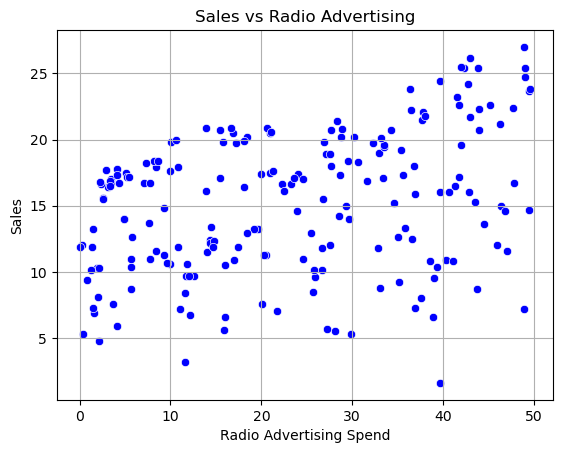

In [6]:
sns.scatterplot(x='Radio', y='Sales', data=df, color='blue')
plt.title("Sales vs Radio Advertising")
plt.xlabel("Radio Advertising Spend")
plt.ylabel("Sales")
plt.grid(True)
plt.show()


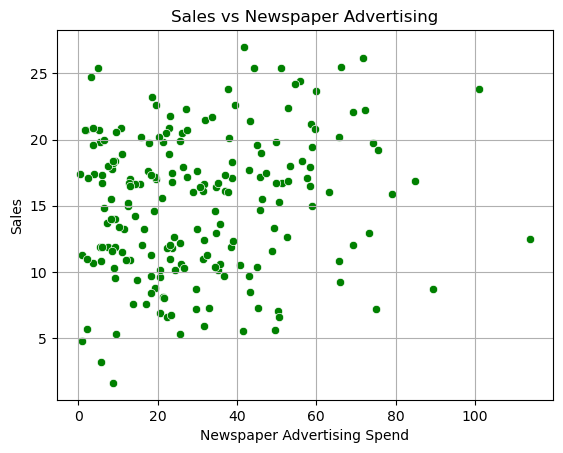

In [7]:
sns.scatterplot(x='Newspaper', y='Sales', data=df, color='green')
plt.title("Sales vs Newspaper Advertising")
plt.xlabel("Newspaper Advertising Spend")
plt.ylabel("Sales")
plt.grid(True)
plt.show()


 Step 4: Feature Selection & Train-Test Split

Step 4.1: Define X (features) and y (target)

In [8]:
X = df[['TV', 'Radio', 'Newspaper']]  # Features
y = df['Sales']                      # Target


 Step 4.2: Split into Training and Test Sets

In [9]:
from sklearn.model_selection import train_test_split

# 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)


Training data shape: (160, 3)
Testing data shape: (40, 3)


Step 5: Train the Regression Model

In [10]:
from sklearn.linear_model import LinearRegression

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [11]:
y_pred = model.predict(X_test)


In [12]:
# Compare actual vs predicted sales
pd.DataFrame({
    'Actual Sales': y_test.values,
    'Predicted Sales': y_pred.round(2)
}).head(10)


,Actual Sales,Predicted Sales
0,16.9,17.03
1,22.4,20.41
2,21.4,23.72
3,7.3,9.27
4,24.7,21.68
5,12.6,12.57
6,22.3,21.08
7,8.4,8.69
8,16.5,17.24
9,16.1,16.67


Step 6: Evaluate the Model

In [13]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Print results
print("Mean Absolute Error (MAE):", round(mae, 2))
print("Root Mean Squared Error (RMSE):", round(rmse, 2))
print("R² Score:", round(r2, 3))
print("Mean Absolute Percentage Error (MAPE):", round(mape, 2), "%")


Mean Absolute Error (MAE): 1.27
Root Mean Squared Error (RMSE): 1.71
R² Score: 0.906
Mean Absolute Percentage Error (MAPE): 10.88 %


 Step 7: Visualize Actual vs Predicted Sales

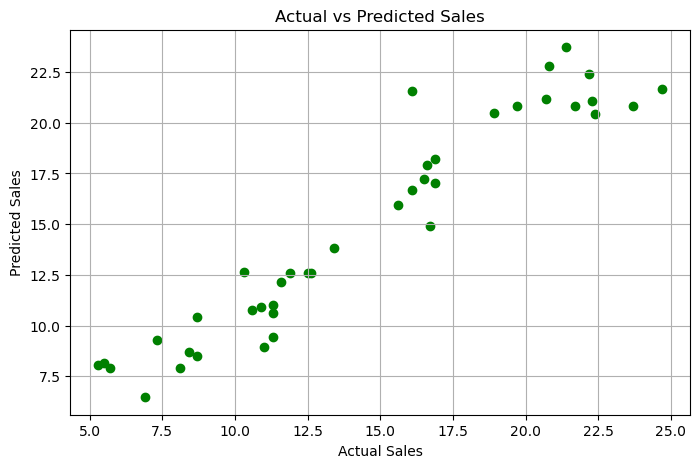

In [14]:
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, color='green')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.grid(True)
plt.show()
